<a href="https://colab.research.google.com/github/JuanCervigon/master2025/blob/main/Regresion_Logistica_datos_simulados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion Logistica con datos simulados

En este cuaderno se ajusta un modelo de Regresión Logística a unos datos generados aleatoriamente

* Generar los datos y visualizarlos
* Ajustar un modelo con `sklearn``
* Aplicar las métricas para analizar la bondad del ajuste
* Ajustar un modelos con `statsmodels`
* Volver a aplicar las métricas para analizar la bondad del ajuste

  


In [23]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generar los datos y visualizarlos

Primero se generan los datos del grupo de ceros (x11,x12) y el vector de ceros.

Segundo se generan los datos del grupo de unos (x21,x22) y el vector de unos.

Finalmente se juntan los datos para construir la matriz x de variables independientes y el vector y de la vriable dependiente

In [30]:
# Definir la desviación típica para usar en los datos generados
sig=3

# Generar los datos del grupo de ceros
x11=np.random.normal(7,sig,250)
x21=np.random.normal(2,sig,250)
# Unir los datos del grupo de ceros
x1=np.concatenate((x11,x21),axis=0)
y1=np.zeros(250)

# Generar los datos del grupo de unos
x12=np.random.normal(2,sig,250)
x22=np.random.normal(6,sig,250)
# Unir los datos del grupo de unos
x2=np.concatenate((x21,x22),axis=0)
y2=np.ones(250)

# Unir los dos grupos de datos en un array de dimensión (500,2)
x=np.transpose([x1,x2])

# Unir los  ceros y los unos en un array de dimensión (500,1)
y=np.concatenate((y1,y2),axis=0).T


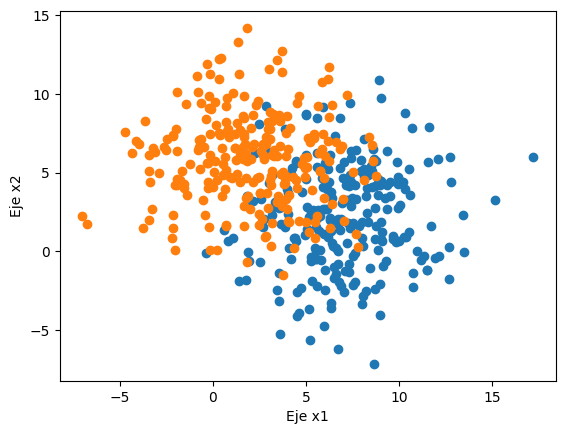

In [31]:
# Visualizar los datos x,y

fig, ax=plt.subplots()
ax.plot(x11,x21,'o')
ax.plot(x12,x22,'o')
ax.set(xlabel='Eje x1', ylabel='Eje x2');


# Regresion Logistica con `sklearn`

In [32]:
# Especificar y estimar el modelo

from sklearn.linear_model import LogisticRegression
modelo_regresion_01 = LogisticRegression(random_state = 0)
m01=modelo_regresion_01.fit(x,y)




In [33]:
# Guardar las betas en las variables b0, b1 y b2
b0,b1,b2 = m01.intercept_[0],m01.coef_[0,0],m01.coef_[0,1]
print(b0,b1,b2)

0.9942943048653284 -0.5363435815059494 0.3872196959294573


In [28]:
# Guardar las probabilidades
# El método predict_proba(x) devuelve las prob de pertenecer a cada clase
# Solo guardo las probabilidades de pertenecer a la clase 1
probabilidades=m01.predict_proba(x)[:,1]

In [ ]:
probabilidades

# Aplicar las métricas para calcular la bondad del ajuste

* Matriz de confusión
* Accuracy
* Precision, Recall, f1-score
* Curva ROC
* Area bajo la curva


In [35]:
# Importar el módulo
from sklearn.metrics import confusion_matrix

# Calcular el vector de predicciones (vector de ceros y unos)
y_pred = m01.predict(x)

# Matriz de confusión
# Comparar la variable dependiente con el vector de predicciones
mc = confusion_matrix(y, y_pred)

print ("Matriz de confusion: \n", mc)

Matriz de confusion: 
 [[208  42]
 [ 38 212]]


In [36]:
# Precision, recall f1-score
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       250
         1.0       0.83      0.85      0.84       250

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



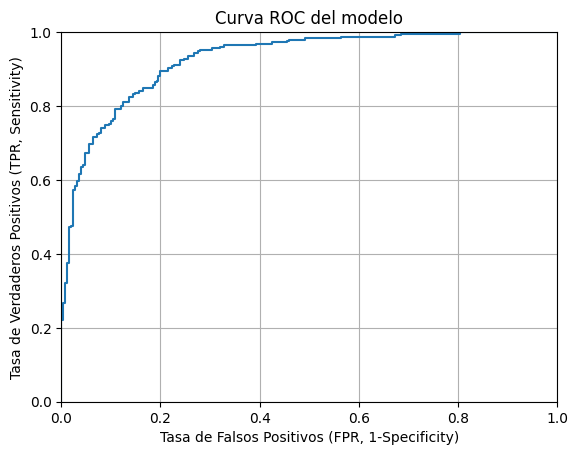

In [37]:
# Curva ROC

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, proba)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC del modelo')
plt.xlabel('Tasa de Falsos Positivos (FPR, 1-Specificity)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR, Sensitivity)')
plt.grid(True)

In [14]:
# Area bajo la curva ROC (auc)
import sklearn
sklearn.metrics.roc_auc_score(y,y_pred)

0.84

# Hacer gráficos de los datos y el hiperplano de separación

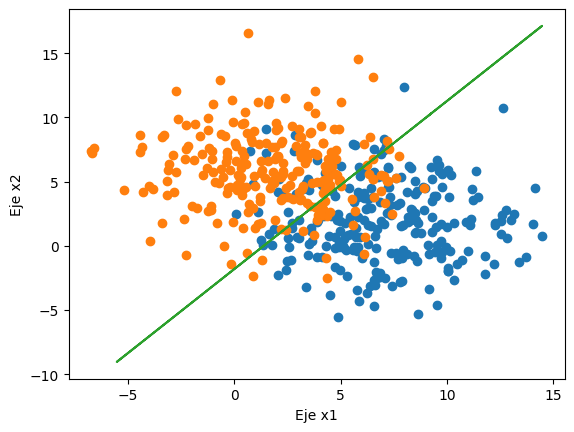

In [15]:
# Gráfico 1
# Visualizar los datos x,y con la recta de separacion x1,yh

# calculo del hiperplano de separacion
yh=(-b0-b1*x1)/b2

# Hacer el gráfico
fig, ax=plt.subplots()
ax.plot(x11,x21,'o')
ax.plot(x12,x22,'o')
ax.plot(x1,yh)
ax.set(xlabel='Eje x1', ylabel='Eje x2');


<ipython-input-16-a593c2ae5ace>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[y == j, 0], x[y == j, 1],


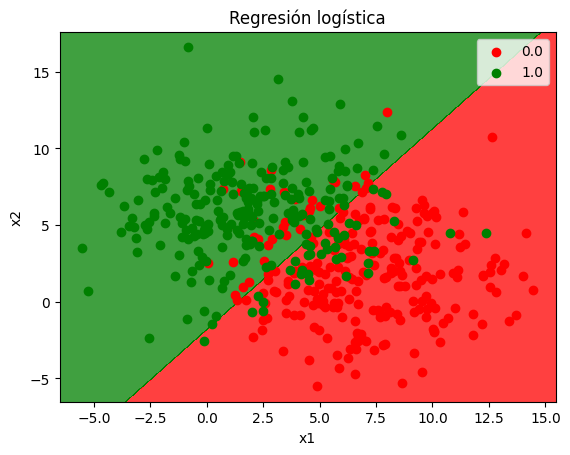

In [16]:
# Grafico 2
# Identificar las regiones definidas por el hiperplano de separación

from matplotlib.colors import ListedColormap

X1, X2 = np.meshgrid(np.arange(start = x[:, 0].min() - 1,
                               stop = x[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x[:, 1].min() - 1,
                               stop = x[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, m01.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y)):
    plt.scatter(x[y == j, 0], x[y == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Regresión logística')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

<ipython-input-17-6d2ed441ca0b>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[y == j, 0], x[y == j, 1],


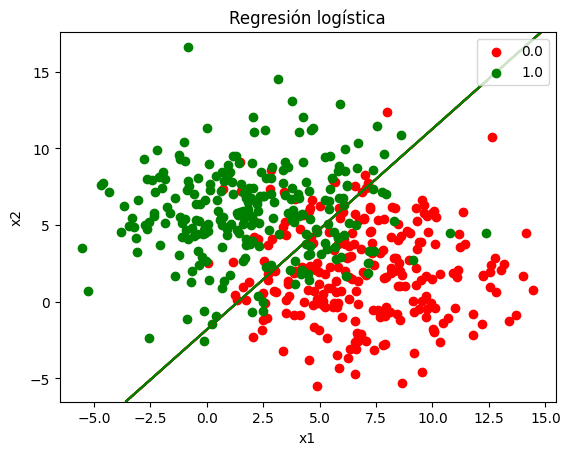

In [17]:
# Grafico 3
# Cambiar los colores del gráfico 1

from matplotlib.colors import ListedColormap

X1, X2 = np.meshgrid(np.arange(x[:, 0].min() - 1,
                               x[:, 0].max() + 1,0.01),
                     np.arange(x[:, 1].min() - 1,
                               x[:, 1].max() + 1,0.01))

# se usa contour en vez de contourf
plt.contour(X1, X2, m01.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

#plt.xlim(X1.min(), X1.max())
#plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y)):
    plt.scatter(x[y == j, 0], x[y == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Regresión logística')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Regresión Logística con `statsmodels`

* Ajustar el modelo
* Calcular las betas
* Inferencia sobre las betas


In [38]:
# Importar la librería
import statsmodels.api as sm

# Añadir una columna de unos a los datos
x1 = sm.add_constant(x)

# Definir el modelo y ajustar los datos
modelo_stats = sm.Logit(y,x1)
m02 = modelo_stats.fit()


Optimization terminated successfully.
         Current function value: 0.357297
         Iterations 7


In [39]:
# Imprimir un resumen de resultados
print(m02.summary())


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      497
Method:                           MLE   Df Model:                            2
Date:                Tue, 04 Mar 2025   Pseudo R-squ.:                  0.4845
Time:                        11:04:42   Log-Likelihood:                -178.65
converged:                       True   LL-Null:                       -346.57
Covariance Type:            nonrobust   LLR p-value:                 1.178e-73
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9975      0.320      3.120      0.002       0.371       1.624
x1            -0.5382      0.054     -9.974      0.000      -0.644      -0.432
x2             0.3886      0.050      7.825      0.0

In [20]:
# Guardar las betas
betas = m02.params
# Guardar las probabilidades
p = m02.predict()

In [21]:
betas

array([ 0.73387176, -0.53038908,  0.40508561])

In [40]:
print(b0, b1, b2)

0.9942943048653284 -0.5363435815059494 0.3872196959294573
